In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
df = pd.read_excel('USSuperstoredata.xlsx', engine="openpyxl")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### MONTHLY SALES TREND

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [4]:
df['Month Year'] = df['Order Date'].dt.to_period('M').astype(str)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


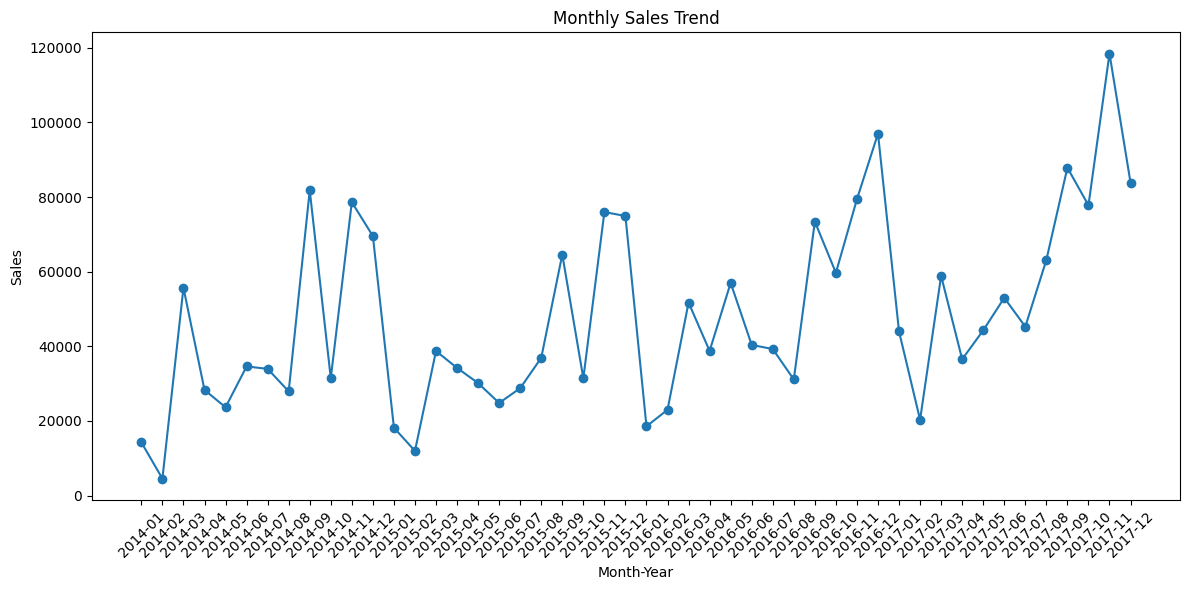

In [6]:
monthly_sales = df.groupby('Month Year')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month Year'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

#### TOP SUB-CATEGORIES BY SALE

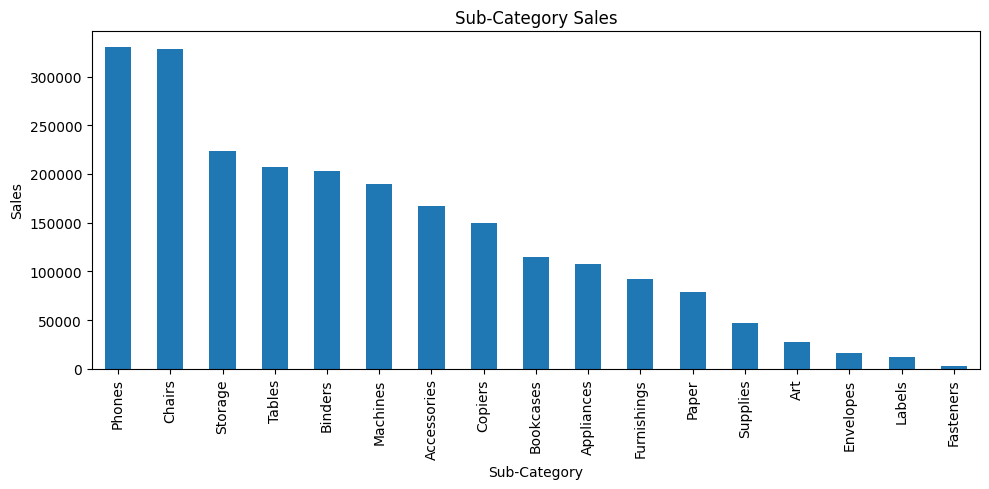

In [8]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcat_sales.plot(kind='bar', figsize=(10,5), title="Sub-Category Sales")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

#### SEGMENT-WISE SALES

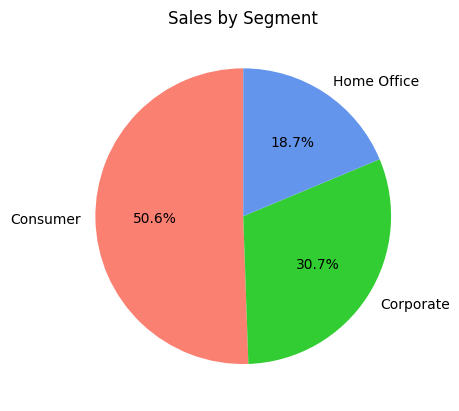

In [18]:
seg_sales = df.groupby('Segment')['Sales'].sum()

seg_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Sales by Segment", colors = ['salmon', 'limegreen', 'cornflowerblue'])
plt.ylabel("")
plt.show()

#### REGION-WISE SALES

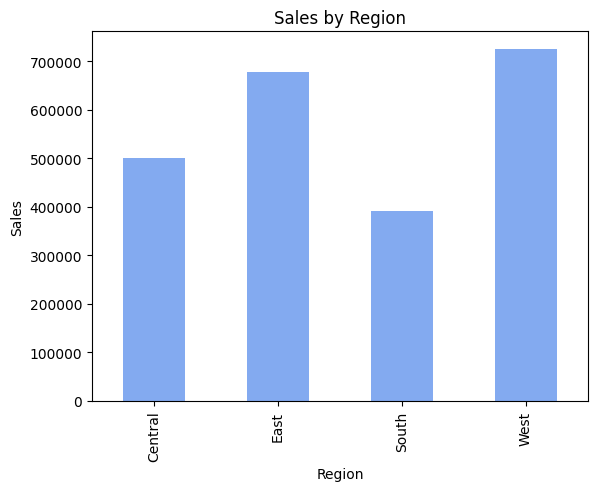

In [24]:
reg_sales = df.groupby("Region")['Sales'].sum()

reg_sales.plot(kind='bar', title="Sales by Region", color='cornflowerblue', alpha=0.8)
plt.ylabel("Sales")
plt.show()

#### PROFIT ANALYSIS

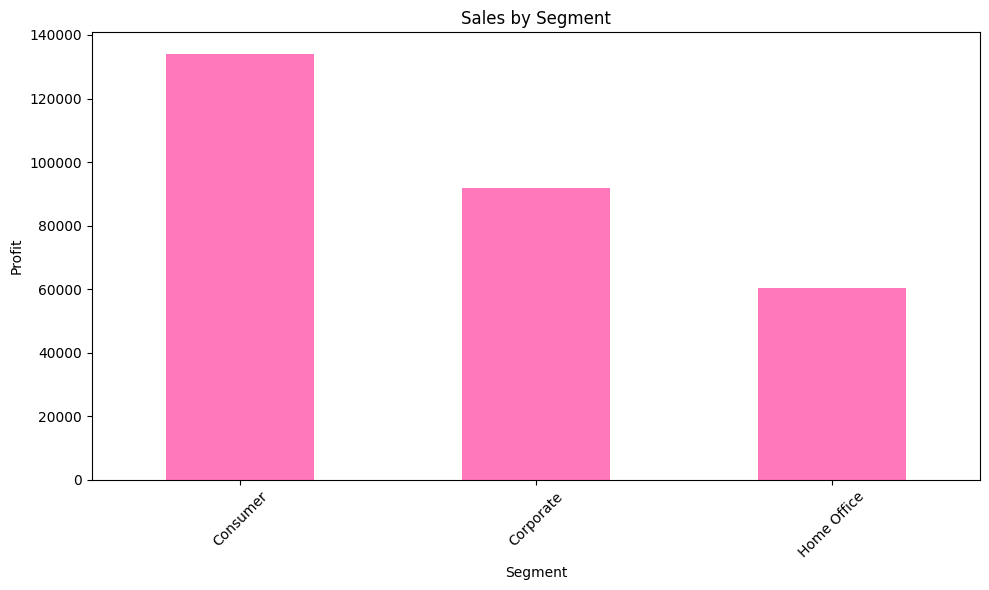

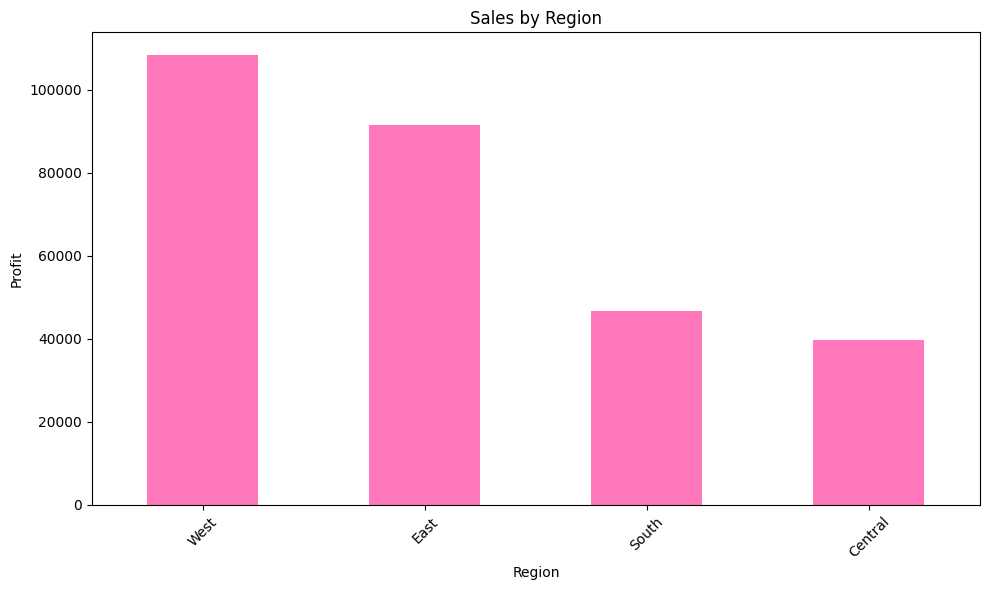

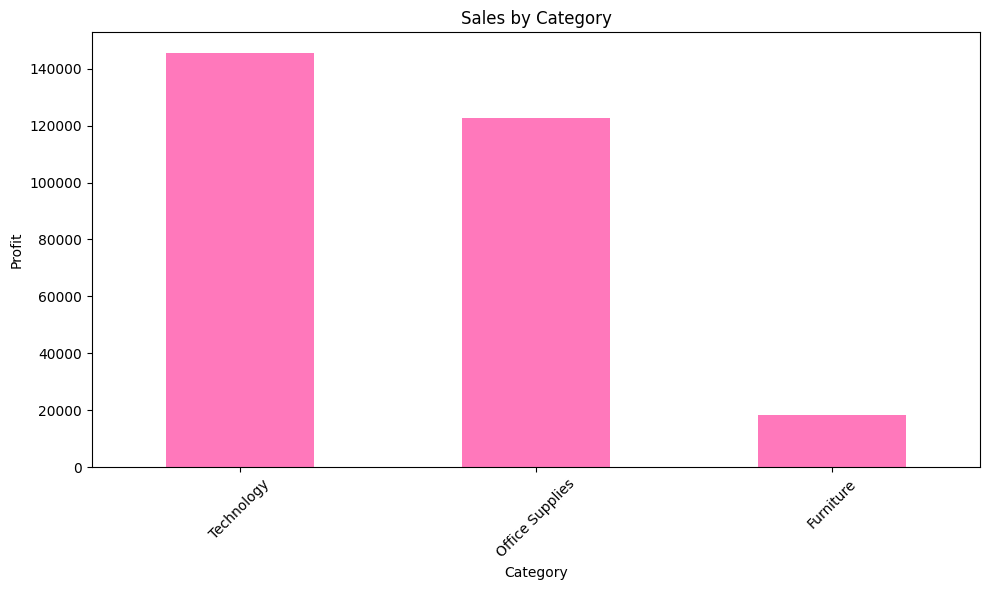

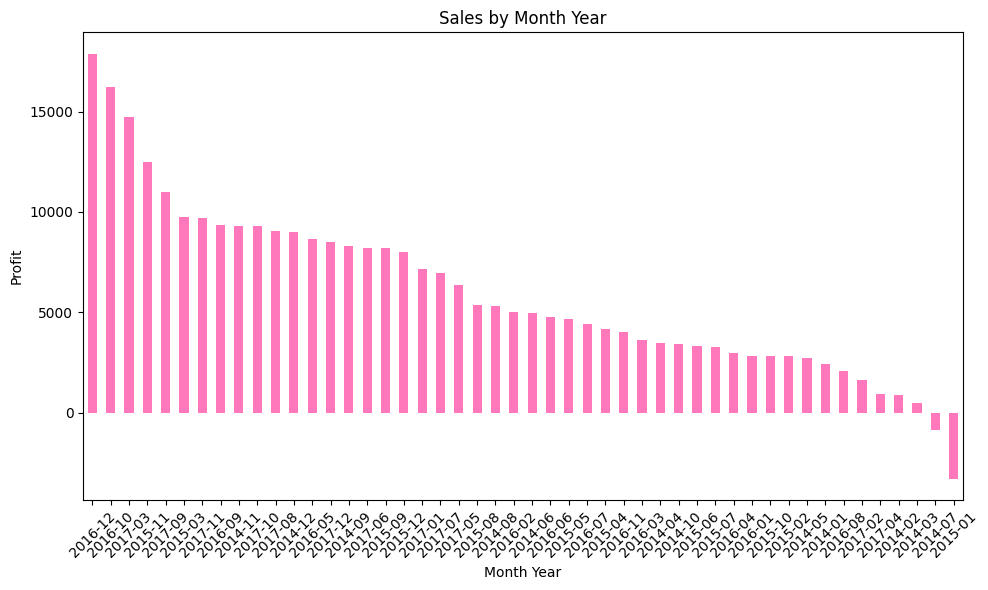

In [47]:
check_profit = [feature for feature in df.columns if feature in ['Segment', 'Region', 'Category', 'Month Year']]
for feature in check_profit:
    feature_profit = df.groupby(feature)['Profit'].sum().sort_values(ascending=False)
    feature_profit.plot(kind='bar', title = f'Sales by {feature}', figsize=(10,6), color='hotpink', alpha=0.9)
    plt.ylabel("Profit")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### PROFIT-TO-SALES RATIO BY CATEGORY

In [42]:
category_profit_sales = df.groupby('Category')[['Sales', 'Profit']].sum()
category_profit_sales['Profit-to-Sales%'] = 100 * category_profit_sales['Profit']/category_profit_sales['Sales']
category_profit_sales = category_profit_sales.sort_values('Profit-to-Sales%', ascending=False)

<Axes: title={'center': 'Profit-to-Sales Ratio by Category'}, ylabel='Category'>

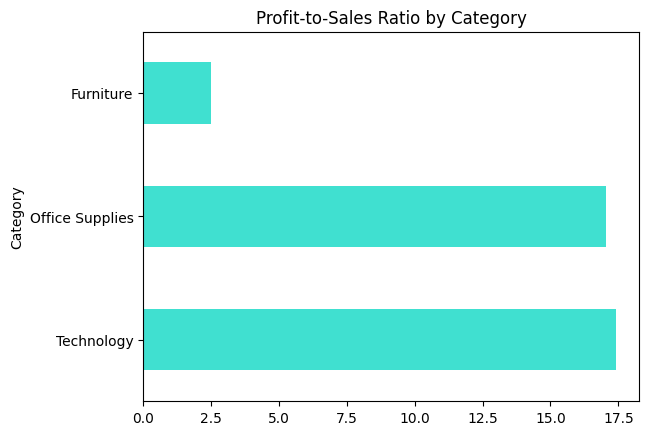

In [45]:
category_profit_sales['Profit-to-Sales%'].plot(kind='barh', title="Profit-to-Sales Ratio by Category", color='turquoise')

#### YEAR-O-YEAR (YoY) GROWTH

<Axes: title={'center': 'YoY Growth (%)'}, xlabel='Year'>

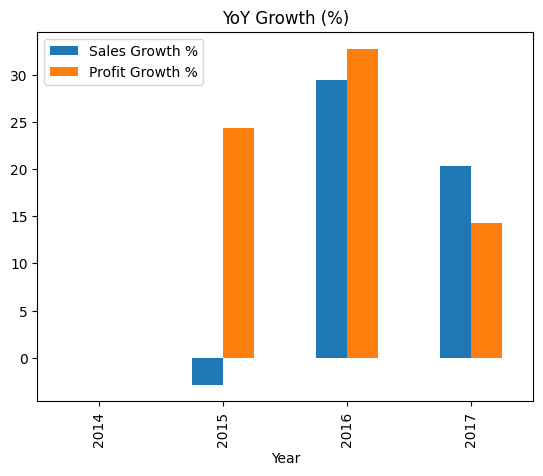

In [48]:
df['Year'] = df['Order Date'].dt.year
yoy = df.groupby('Year')[['Sales', 'Profit']].sum()

yoy['Sales Growth %'] = yoy['Sales'].pct_change() * 100
yoy['Profit Growth %'] = yoy['Profit'].pct_change() * 100

yoy[['Sales Growth %', 'Profit Growth %']].plot(kind='bar', title='YoY Growth (%)')